# Convergence of estimators on Ishigami

In this example, we present the convergence of the sensitivity indices of the Ishigami test function.

We compare different estimators.
* Sampling methods with different estimators: Saltelli, Mauntz-Kucherenko, Martinez, Jansen,
* Sampling methods with different design of experiments: Monte-Carlo, LHS, Quasi-Monte-Carlo (TODO),
* Polynomial chaos (TODO).

In [1]:
import openturns as ot
import otbenchmark as otb
import openturns.viewer as otv
import time
import numpy as np
import pylab as pl

When we estimate Sobol' indices, we may encounter the following warning messages:
```
WRN - The estimated first order Sobol index (2) is greater than its total order index . You may increase the sampling size.
WRN - The estimated total order Sobol index (2) is lesser than first order index . You may increase the sampling size.
```
Lots of these messages are printed in the current Notebook. This is why we disable them with:

In [2]:
ot.Log.Show(ot.Log.NONE)

In [3]:
problem = otb.IshigamiSensitivity()
problem

In [4]:
print(problem)

name = Ishigami
distribution = ComposedDistribution(Uniform(a = -3.14159, b = 3.14159), Uniform(a = -3.14159, b = 3.14159), Uniform(a = -3.14159, b = 3.14159), IndependentCopula(dimension = 3))
function = ParametricEvaluation([X1,X2,X3,a,b]->[sin(X1) + a * sin(X2)^2 + b * X3^4 * sin(X1)], parameters positions=[3,4], parameters=[a : 7, b : 0.1], input positions=[0,1,2])
firstOrderIndices = [0.313905,0.442411,0]
totalOrderIndices = [0.557589,0.442411,0.243684]


In [5]:
distribution = problem.getInputDistribution()
model = problem.getFunction()

In [6]:
# Exact first and total order
exact_first_order = problem.getFirstOrderIndices()
exact_first_order

class=Point name=Unnamed dimension=3 values=[0.313905,0.442411,0]

In [7]:
exact_total_order = problem.getTotalOrderIndices()
exact_total_order

class=Point name=Unnamed dimension=3 values=[0.557589,0.442411,0.243684]

## Perform sensitivity analysis

In [8]:
# Create X/Y data
ot.RandomGenerator.SetSeed(0)
size = 10000
inputDesign = ot.SobolIndicesExperiment(distribution, size).generate()
outputDesign = model(inputDesign)

In [9]:
# Compute first order indices using the Saltelli estimator
sensitivityAnalysis = ot.SaltelliSensitivityAlgorithm(inputDesign, outputDesign, size)
computed_first_order = sensitivityAnalysis.getFirstOrderIndices()
computed_total_order = sensitivityAnalysis.getTotalOrderIndices()

In [10]:
# Compare with exact results
print("Sample size : ", size)
# First order
# Compute absolute error (the LRE cannot be computed,
# because S can be zero)
print("Computed first order = ", computed_first_order)
print("Exact first order    = ", exact_first_order)
# Total order
print("Computed total order = ", computed_total_order)
print("Exact total order    = ", exact_total_order)

Sample size :  10000
Computed first order =  [0.302745,0.460846,0.0066916]
Exact first order    =  [0.313905,0.442411,0]
Computed total order =  [0.574996,0.427126,0.256689]
Exact total order    =  [0.557589,0.442411,0.243684]


In [11]:
dimension = distribution.getDimension()

In [12]:
first_order_LRE = ot.Point(dimension)
total_order_LRE = ot.Point(dimension)
for i in range(dimension):
    first_order_LRE[i] = otb.ComputeLogRelativeError(
        exact_first_order[i], computed_first_order[i]
    )
    total_order_LRE[i] = otb.ComputeLogRelativeError(
        exact_total_order[i], computed_total_order[i]
    )

In [13]:
for i in range(dimension):
    print(
        "LRE(S%d) = %.2f, LRE(T%d) = %.2f"
        % (i, first_order_LRE[i], i, total_order_LRE[i])
    )

LRE(S0) = 1.45, LRE(T0) = 1.51
LRE(S1) = 1.38, LRE(T1) = 1.46
LRE(S2) = 0.00, LRE(T2) = 1.27


Estimator: Saltelli
Elapsed = 0.0 (s), Sample size = 40
Elapsed = 0.0 (s), Sample size = 80
Elapsed = 0.0 (s), Sample size = 160
Elapsed = 0.0 (s), Sample size = 320
Elapsed = 0.0 (s), Sample size = 640
Elapsed = 0.1 (s), Sample size = 1280
Elapsed = 0.1 (s), Sample size = 2560
Elapsed = 0.2 (s), Sample size = 5120
Elapsed = 0.4 (s), Sample size = 10240
Elapsed = 0.8 (s), Sample size = 20480
Elapsed = 1.7 (s), Sample size = 40960
Elapsed = 3.2 (s), Sample size = 81920
Elapsed = 6.17 (s)
Estimator: Martinez
Elapsed = 0.0 (s), Sample size = 40
Elapsed = 0.0 (s), Sample size = 80
Elapsed = 0.0 (s), Sample size = 160
Elapsed = 0.0 (s), Sample size = 320
Elapsed = 0.0 (s), Sample size = 640
Elapsed = 0.1 (s), Sample size = 1280
Elapsed = 0.1 (s), Sample size = 2560
Elapsed = 0.2 (s), Sample size = 5120
Elapsed = 0.5 (s), Sample size = 10240
Elapsed = 0.9 (s), Sample size = 20480
Elapsed = 1.7 (s), Sample size = 40960
Elapsed = 3.3 (s), Sample size = 81920
Elapsed = 6.83 (s)
Estimator: Janse

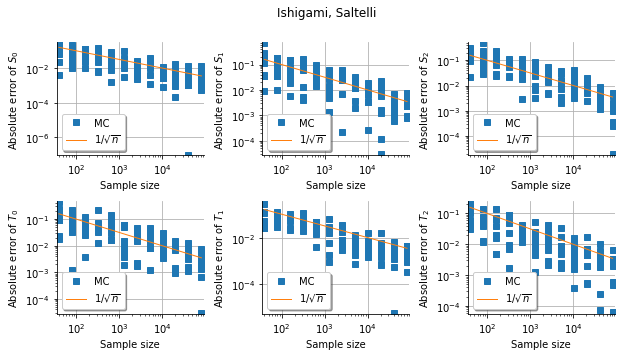

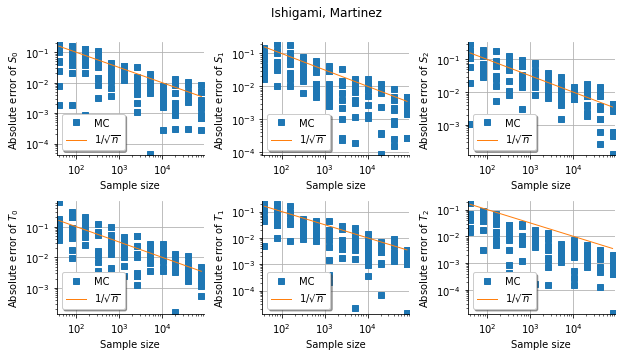

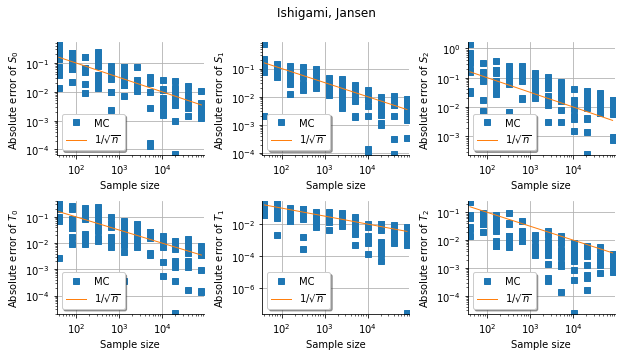

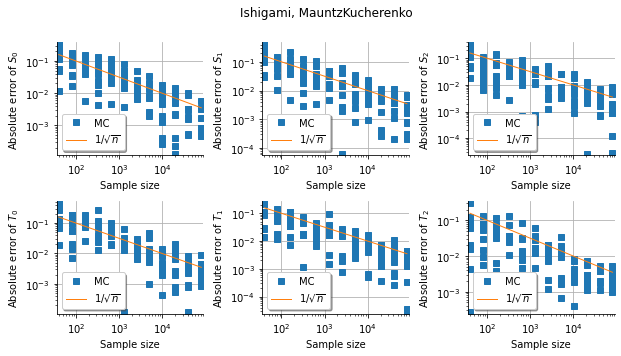

In [14]:
ot.ResourceMap.SetAsString("SobolIndicesExperiment-SamplingMethod", "MonteCarlo")
for estimator in ["Saltelli", "Martinez", "Jansen", "MauntzKucherenko"]:
    print("Estimator:", estimator)
    grid = otb.plot_Sobol_grid(
        problem,
        numberOfExperiments=12,
        numberOfRepetitions=10,
        maximum_elapsed_time=5.0,
        sample_size_initial=20,
        estimator=estimator,
        verbose=True,
    )
    view = otv.View(grid)
    figure = view.getFigure()
    _ = figure.suptitle("%s, %s" % (problem.getName(), estimator))
    figure.set_figwidth(10.0)
    figure.set_figheight(5.0)
    figure.subplots_adjust(wspace=0.4, hspace=0.4)

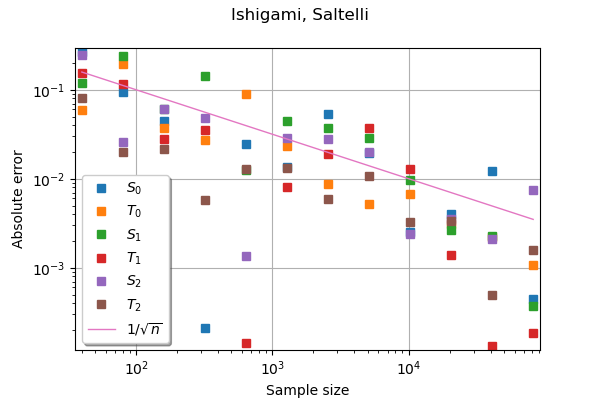

In [15]:
otb.plot_Sobol_curve(
    problem,
    numberOfExperiments=12,
    numberOfRepetitions=1,
    maximum_elapsed_time=2.0,
    sample_size_initial=20,
    estimator="Saltelli",
)

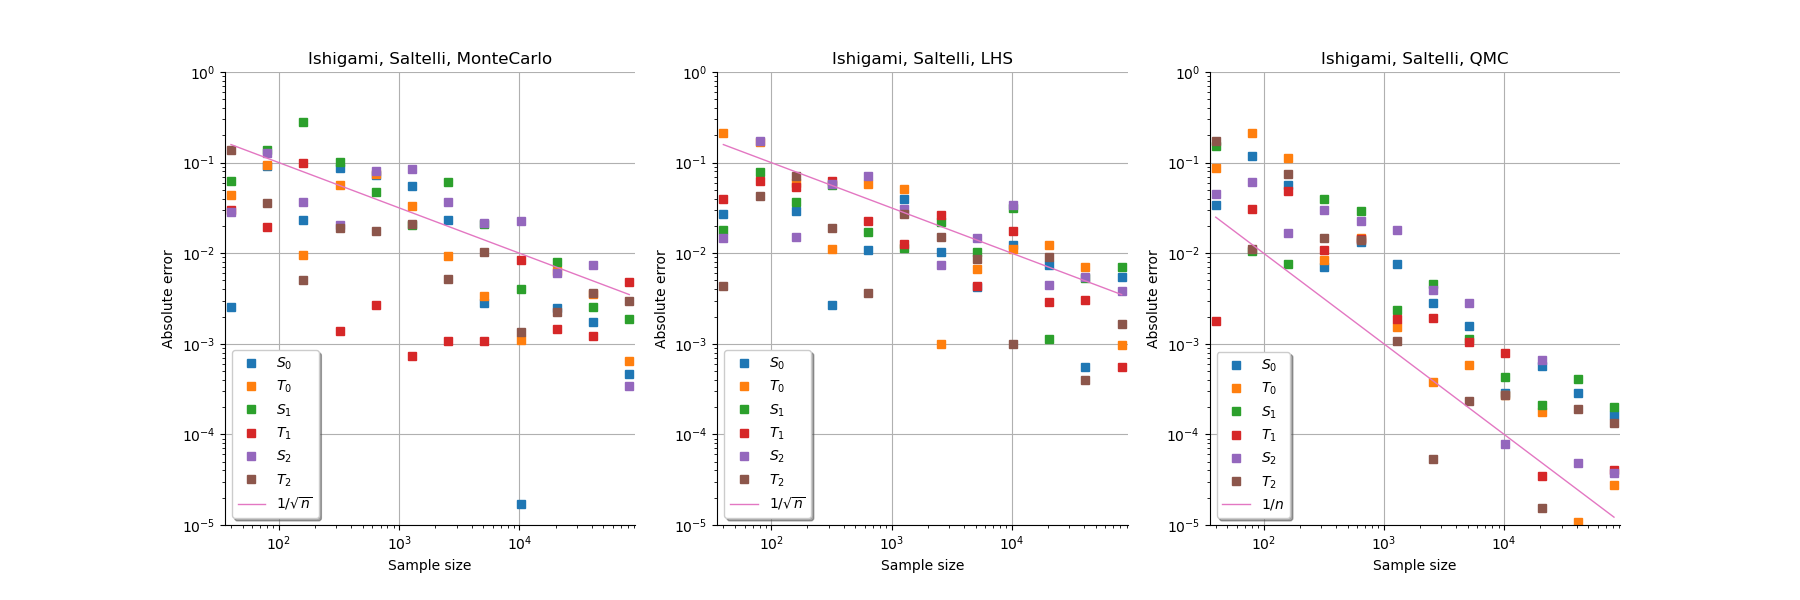

In [16]:
grid = ot.GridLayout(1, 3)
maximum_absolute_error = 1.0
minimum_absolute_error = 1.0e-5
sampling_method_list = ["MonteCarlo", "LHS", "QMC"]
for sampling_method_index in range(3):
    sampling_method = sampling_method_list[sampling_method_index]
    ot.ResourceMap.SetAsString("SobolIndicesExperiment-SamplingMethod", sampling_method)
    graph = otb.plot_Sobol_curve(
        problem,
        numberOfExperiments=12,
        numberOfRepetitions=1,
        maximum_elapsed_time=2.0,
        sample_size_initial=20,
        estimator="Saltelli",
    )
    # Change bounding box
    box = graph.getBoundingBox()
    bound = box.getLowerBound()
    bound[1] = minimum_absolute_error
    box.setLowerBound(bound)
    bound = box.getUpperBound()
    bound[1] = maximum_absolute_error
    box.setUpperBound(bound)
    graph.setBoundingBox(box)
    title = graph.getTitle()
    title += ", " + sampling_method
    graph.setTitle(title)
    grid.setGraph(0, sampling_method_index, graph)
grid